In [2]:
import h5py
import numpy as np


In [3]:

file_path = '/global/homes/a/abgulhan/WORKING/ml_converted/data-gm-year7-22-biweekly.hdf5'
f = h5py.File(file_path, 'r')

In [4]:
for name in f.keys():
    print(name)


forward_1
forward_10
forward_11
forward_12
forward_13
forward_14
forward_15
forward_16
forward_17
forward_18
forward_19
forward_2
forward_20
forward_21
forward_22
forward_23
forward_24
forward_25
forward_26
forward_27
forward_28
forward_29
forward_3
forward_30
forward_31
forward_32
forward_33
forward_34
forward_35
forward_36
forward_37
forward_38
forward_39
forward_4
forward_40
forward_41
forward_42
forward_43
forward_44
forward_45
forward_46
forward_47
forward_48
forward_49
forward_5
forward_50
forward_51
forward_52
forward_53
forward_54
forward_55
forward_56
forward_57
forward_58
forward_59
forward_6
forward_60
forward_61
forward_62
forward_63
forward_64
forward_65
forward_66
forward_67
forward_68
forward_7
forward_70
forward_71
forward_72
forward_73
forward_74
forward_75
forward_76
forward_77
forward_78
forward_79
forward_8
forward_80
forward_81
forward_82
forward_83
forward_84
forward_85
forward_87
forward_88
forward_89
forward_9
forward_90
forward_91
forward_92
forward_93
forward_

In [5]:
fwd = "forward_2"
print(f[fwd])
print(f[fwd].attrs)
print(f[fwd].shape)
print(f[fwd].dtype)

<HDF5 dataset "forward_2": shape (417, 60, 100, 100, 6), type "<f4">
<Attributes of HDF5 object at 140485313545616>
(417, 60, 100, 100, 6)
float32


In [6]:
print(f[fwd][..., 0])

[[[[-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   ...
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]]

  [[-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   ...
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]]

  [[-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   ...
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
   [-1

In [7]:
fwd1 = "forward_1"
fwd2 = "forward_2"

print(f[fwd1] == f[fwd2])

False


In [8]:
f[fwd].shape

(417, 60, 100, 100, 6)

In [9]:
import numpy as np

#the list of variables of size (time_step, z=60, y=100, x=100, parameters=6)
var_list=['timeDaily_avg_layerThickness',
 'timeDaily_avg_velocityZonal',
 'timeDaily_avg_velocityMeridional',
 'timeDaily_avg_activeTracers_temperature',
 'timeDaily_avg_activeTracers_salinity',
 'var_x'] # for f[fwd][..., 5], all values are same


In [10]:
def clean_outliers(data, threshold=1e30):
    """
    Clean outliers in the data by replacing values greater than the threshold with NaN.
    """
    data = np.where(np.abs(data) > threshold, np.nan, data)
    return data

In [10]:

for i, var in enumerate(var_list):
    arr = f[fwd][..., i]  # shape: (time, z, y, x)
    arr = clean_outliers(arr)  # Clean outliers if necessary
    # Check constancy along time for each z layer
    const_per_z = [np.all(arr[:, z, ...] == arr[0, z, ...]) for z in range(arr.shape[1])]
    print(f"{var}:")
    for z, is_const in enumerate(const_per_z):
        print(f"  z={z}: {'constant' if is_const else 'not constant'}")
    arr = f[fwd][..., i]
    is_constant = np.all(arr == arr[0])
    print(f"{var}: {'constant' if is_constant else 'not constant'} across time steps")
    


timeDaily_avg_layerThickness:
  z=0: not constant
  z=1: not constant
  z=2: not constant
  z=3: not constant
  z=4: not constant
  z=5: not constant
  z=6: not constant
  z=7: not constant
  z=8: not constant
  z=9: not constant
  z=10: not constant
  z=11: not constant
  z=12: not constant
  z=13: not constant
  z=14: not constant
  z=15: not constant
  z=16: not constant
  z=17: not constant
  z=18: not constant
  z=19: not constant
  z=20: not constant
  z=21: not constant
  z=22: not constant
  z=23: not constant
  z=24: not constant
  z=25: not constant
  z=26: not constant
  z=27: not constant
  z=28: not constant
  z=29: not constant
  z=30: not constant
  z=31: not constant
  z=32: not constant
  z=33: not constant
  z=34: not constant
  z=35: not constant
  z=36: not constant
  z=37: not constant
  z=38: not constant
  z=39: not constant
  z=40: not constant
  z=41: not constant
  z=42: not constant
  z=43: not constant
  z=44: not constant
  z=45: not constant
  z=46: not co

In [11]:
# Check constancy only in the region x=40:60, y=40:60
x_start, x_end = 40, 60
y_start, y_end = 40, 60

for i, var in enumerate(var_list):
    arr = f[fwd][..., i]  # shape: (time, z, y, x)
    arr = clean_outliers(arr)  # Clean outliers if necessary
    # Restrict to region of interest
    arr_roi = arr[:, :, y_start:y_end, x_start:x_end]
    # Check constancy along time for each z layer in the region
    const_per_z = [np.all(arr_roi[:, z, ...] == arr_roi[0, z, ...]) for z in range(arr_roi.shape[1])]
    print(f"{var}:")
    for z, is_const in enumerate(const_per_z):
        print(f"  z={z}: {'constant' if is_const else 'not constant'} in x={x_start}:{x_end}, y={y_start}:{y_end}")
    is_constant = np.all(arr_roi == arr_roi[0])
    print(f"{var}: {'constant' if is_constant else 'not constant'} across time steps in x={x_start}:{x_end}, y={y_start}:{y_end}")
    

timeDaily_avg_layerThickness:
  z=0: not constant in x=40:60, y=40:60
  z=1: not constant in x=40:60, y=40:60
  z=2: not constant in x=40:60, y=40:60
  z=3: not constant in x=40:60, y=40:60
  z=4: not constant in x=40:60, y=40:60
  z=5: not constant in x=40:60, y=40:60
  z=6: not constant in x=40:60, y=40:60
  z=7: not constant in x=40:60, y=40:60
  z=8: not constant in x=40:60, y=40:60
  z=9: not constant in x=40:60, y=40:60
  z=10: not constant in x=40:60, y=40:60
  z=11: not constant in x=40:60, y=40:60
  z=12: not constant in x=40:60, y=40:60
  z=13: not constant in x=40:60, y=40:60
  z=14: not constant in x=40:60, y=40:60
  z=15: not constant in x=40:60, y=40:60
  z=16: not constant in x=40:60, y=40:60
  z=17: not constant in x=40:60, y=40:60
  z=18: not constant in x=40:60, y=40:60
  z=19: not constant in x=40:60, y=40:60
  z=20: not constant in x=40:60, y=40:60
  z=21: not constant in x=40:60, y=40:60
  z=22: not constant in x=40:60, y=40:60
  z=23: not constant in x=40:60, y=40

KeyboardInterrupt: 

In [11]:

# Calculate and check invariants across time steps

# Get arrays for each variable
depth = clean_outliers(f[fwd][..., 0])  # timeDaily_avg_layerThickness
vel_zonal = clean_outliers(f[fwd][..., 1])  # timeDaily_avg_velocityZonal
vel_merid = clean_outliers(f[fwd][..., 2])  # timeDaily_avg_velocityMeridional
temperature = clean_outliers(f[fwd][..., 3])  # timeDaily_avg_activeTracers_temperature
salinity = clean_outliers(f[fwd][..., 4])  # timeDaily_avg_activeTracers_salinity

# Total volume per time step
total_volume = np.nansum(depth, axis=(1,2,3))

# Total salinity per time step
total_salt = np.nansum(salinity * depth, axis=(1,2,3))

# Total temperature per time step
total_temperature = np.nansum(temperature * depth, axis=(1,2,3))

# Total velocity per time step (sum of magnitudes)
total_velocity = np.nansum(np.sqrt(vel_zonal**2 + vel_merid**2), axis=(1,2,3))

# Total kinetic energy per time step
total_kinetic_energy = np.nansum(0.5 * (vel_zonal**2 + vel_merid**2) * depth, axis=(1,2,3))

g = 9.81  # gravitational acceleration in m/s^2

# Compute potential energy: PE = g * sum(depth * z * cell_area)
# Assume uniform grid spacing in z, y, x
nz, ny, nx = depth.shape[1:4]
# z coordinate: center of each layer, for each (time, y, x) point
# thickness is (time, z, y, x)
# z_edges: cumulative sum of thicknesses along z, starting from 0
z_edges = np.concatenate(
    [np.zeros_like(depth[:, :1, ...]), np.cumsum(depth, axis=1)], axis=1
)  # shape: (time, z+1, y, x)
z_centers = 0.5 * (z_edges[:, :-1, ...] + z_edges[:, 1:, ...])  # (time, z, y, x)

# Remove any NaNs in z_centers that may arise from cumulative sum
z_centers = np.where(np.isnan(z_centers), 0, z_centers)

# Potential energy per time step (sum over z, y, x)
total_potential_energy = np.nansum(g * depth * z_centers, axis=(1,2,3))

def print_stats(name, arr):
    min_val = np.nanmin(arr)
    max_val = np.nanmax(arr)
    mean_val = np.nanmean(arr)
    std_val = np.nanstd(arr)
    # Percentage difference between min and max relative to mean
    if mean_val != 0:
        pct_diff = 100 * (max_val - min_val) / mean_val
    else:
        pct_diff = np.nan
    print(f"{name}:")
    print(f"  min: {min_val}, max: {max_val}, mean: {mean_val}, std: {std_val}")
    print(f"  percentage difference (max-min)/mean: {pct_diff:.6f}%")

print_stats("Total volume", total_volume)
print_stats("Total salinity", total_salt)
print_stats("Total temperature", total_temperature)
print_stats("Total velocity", total_velocity)
print_stats("Total kinetic energy", total_kinetic_energy)
print_stats("Total potential energy", total_potential_energy)
print_stats("Total energy (kinetic + potential)", total_kinetic_energy + total_potential_energy)


Total volume:
  min: 12951666.0, max: 12951690.0, mean: 12951680.0, std: 4.625546932220459
  percentage difference (max-min)/mean: 0.000185%
Total salinity:
  min: 452049920.0, max: 452050784.0, mean: 452050368.0, std: 191.55824279785156
  percentage difference (max-min)/mean: 0.000191%
Total temperature:
  min: 32719970.0, max: 32811220.0, mean: 32773354.0, std: 24047.91015625
  percentage difference (max-min)/mean: 0.278427%
Total velocity:
  min: 28270.232421875, max: 30863.3828125, mean: 29614.33984375, std: 617.7592163085938
  percentage difference (max-min)/mean: 8.756401%
Total kinetic energy:
  min: 46869.5078125, max: 53164.30859375, mean: 49488.19140625, std: 1290.3905029296875
  percentage difference (max-min)/mean: 12.719804%
Total potential energy:
  min: 143229468672.0, max: 143230418944.0, mean: 143229943808.0, std: 182342.15625
  percentage difference (max-min)/mean: 0.000663%
Total energy (kinetic + potential):
  min: 143229517824.0, max: 143230468096.0, mean: 14322999

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Loop over all parameters
for i, var in enumerate(var_list):
    data = f[fwd][..., i]  # (time, z, y, x)
    data = clean_outliers(data)  # Clean outliers if necessary
    time_steps = data.shape[0]

    # Replace fill value with np.nan if needed
    #fill_value = -9.999991e+33
    #data = np.where(data == fill_value, np.nan, data)

    # Choose a range of layers to average, e.g., layers 0 to 59 (inclusive)
    layer_start = 0
    layer_end = 10#60  # exclusive

    # Average over the selected layers along the z-axis (axis=1), ignoring nan
    frames = np.nanmean(data[:, layer_start:layer_end, :, :], axis=1)  # shape: (time, y, x)

    # Normalize and center the values before diff_frames
    # Compute mean and std over all frames, ignoring NaNs
    mean_val = np.nanmean(frames)
    std_val = np.nanstd(frames)
    if std_val == 0 or np.isnan(std_val):
        frames_norm = frames - mean_val
    else:
        frames_norm = (frames - mean_val) / std_val

    fig, ax = plt.subplots()
    diff_frames = frames_norm - frames_norm[0]  # Show changes relative to first frame

    # # Show distribution of all diff_frames values, zooming in on the central cluster
    # flat_vals = diff_frames.flatten()
    # flat_vals = flat_vals[~np.isnan(flat_vals)]  # Remove NaNs if any

    # if flat_vals.size > 0:
    #     # Compute 0.5 and 99.5 percentiles to ignore outliers
    #     p_low, p_high = np.percentile(flat_vals, [0.5, 99.5])

    #     plt.figure()
    #     plt.hist(flat_vals, bins=100, range=(p_low, p_high))
    #     plt.title(f'Distribution of diff_frames values for {var}\n(central 99% region)')
    #     plt.xlabel('Value')
    #     plt.ylabel('Frequency')
    #     plt.show()
    # else:
    #     print(f"Skipping histogram for {var}: no valid (non-NaN) values in diff_frames.")

    vmax = np.nanmax(np.abs(frames))
    im = ax.imshow(frames[0], cmap='seismic', animated=True, vmin=-vmax, vmax=vmax)
    plt.colorbar(im, ax=ax)
    ax.set_title(f'{var}, z={layer_start}-{layer_end}, Time Step: 0')

    def update(frame):
        im.set_array(frames[frame])
        ax.set_title(f'{var}, z={layer_start}-{layer_end}, Time Step: {frame}')
        return [im]
    def update_diff(frame):
        im.set_array(diff_frames[frame])
        ax.set_title(f'Change from t=0, {var}, z={layer_start}-{layer_end}, Time Step: {frame}')
        return [im]

    ani = animation.FuncAnimation(fig, update, frames=time_steps, blit=True)

    # Save as animated gif
    ani.save(f'{var}_timesteps.gif', writer='pillow', fps=10)
    plt.close(fig)
    print(f"Saved animation for {var}")

/tmp/ipykernel_1344289/1110537742.py:19: RuntimeWarning: Mean of empty slice
  frames = np.nanmean(data[:, layer_start:layer_end, :, :], axis=1)  # shape: (time, y, x)


Saved animation for timeDaily_avg_layerThickness


/tmp/ipykernel_1344289/1110537742.py:19: RuntimeWarning: Mean of empty slice
  frames = np.nanmean(data[:, layer_start:layer_end, :, :], axis=1)  # shape: (time, y, x)


Saved animation for timeDaily_avg_velocityZonal


/tmp/ipykernel_1344289/1110537742.py:19: RuntimeWarning: Mean of empty slice
  frames = np.nanmean(data[:, layer_start:layer_end, :, :], axis=1)  # shape: (time, y, x)


Saved animation for timeDaily_avg_velocityMeridional


/tmp/ipykernel_1344289/1110537742.py:19: RuntimeWarning: Mean of empty slice
  frames = np.nanmean(data[:, layer_start:layer_end, :, :], axis=1)  # shape: (time, y, x)


Saved animation for timeDaily_avg_activeTracers_temperature


/tmp/ipykernel_1344289/1110537742.py:19: RuntimeWarning: Mean of empty slice
  frames = np.nanmean(data[:, layer_start:layer_end, :, :], axis=1)  # shape: (time, y, x)


Saved animation for timeDaily_avg_activeTracers_salinity
Saved animation for var_x


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Extract velocity data
vel_zonal = clean_outliers(f[fwd][..., 1])  # timeDaily_avg_velocityZonal
vel_merid = clean_outliers(f[fwd][..., 2])  # timeDaily_avg_velocityMeridional

# Average over depth layers
layer_start = 0
layer_end = 10
u_avg = np.nanmean(vel_zonal[:, layer_start:layer_end], axis=1)
v_avg = np.nanmean(vel_merid[:, layer_start:layer_end], axis=1)

# Get correct spatial dimensions
time_steps, y_size, x_size = u_avg.shape

def create_animation(total_frames=None):
    """Create animation with frame count control"""
    # Determine frames to use
    if total_frames is None or total_frames <= 0 or total_frames > time_steps:
        frames_to_use = time_steps
    else:
        frames_to_use = total_frames
    
    # Create spatial grid
    x, y = np.meshgrid(np.arange(x_size), np.arange(y_size))
    
    # Subsample for cleaner visualization
    subsample = 3
    x_sub = x[::subsample, ::subsample]
    y_sub = y[::subsample, ::subsample]
    
    # Subsample velocities
    u_sub = np.zeros((frames_to_use, y_sub.shape[0], y_sub.shape[1]))
    v_sub = np.zeros((frames_to_use, y_sub.shape[0], y_sub.shape[1]))
    
    for t in range(frames_to_use):
        u_sub[t] = u_avg[t, ::subsample, ::subsample]
        v_sub[t] = v_avg[t, ::subsample, ::subsample]

    fig, ax = plt.subplots(figsize=(14, 10))
    ax.set_ylim(y_size, 0)  # Invert y-axis for correct orientation
    ax.set_xlim(0, x_size)
    ax.set_ylim(0, y_size)
    ax.set_aspect('equal')
    ax.set_title("Ocean Current Velocity", fontsize=16)
    ax.set_xlabel("X Position", fontsize=12)
    ax.set_ylabel("Y Position", fontsize=12)
    
    # Calculate initial speed
    speed0 = np.sqrt(u_sub[0]**2 + v_sub[0]**2)
    
    # Create quiver plot with improved arrow proportions
    Q = ax.quiver(
        x_sub, y_sub, 
        u_sub[0], v_sub[0], 
        speed0,
        cmap='viridis',
        scale=0.075,          # Reduced scale for longer arrows
        scale_units='xy',
        angles='xy',
        width=0.005,       # Thinner shafts
        headwidth=3,        # Smaller arrowheads
        headlength=4,       # Shorter head length
        headaxislength=3.5,  # Smaller head axis
        pivot='mid'
    )
    cbar = fig.colorbar(Q, ax=ax)
    cbar.set_label('Current Speed (m/s)', fontsize=12)

    def update(frame):
        # Calculate current speed
        current_speed = np.sqrt(u_sub[frame]**2 + v_sub[frame]**2)
        
        # Update arrow components and colors
        Q.set_UVC(u_sub[frame], v_sub[frame], current_speed)
        
        # Update title
        ax.set_title(f"Ocean Current Velocity (Frame: {frame+1}/{frames_to_use})", fontsize=16)
        
        return Q,

    ani = animation.FuncAnimation(
        fig, 
        update, 
        frames=frames_to_use, 
        interval=100,  # 10 FPS
        blit=True
    )
    
    # Save animation
    output_dir = 'figures'
    output_file = f'{output_dir}/ocean_currents_{frames_to_use}frames.gif'
    ani.save(output_file, 
             writer='pillow', 
             fps=10, 
             dpi=150,
             bitrate=1800)
    plt.close(fig)
    print(f"Saved {frames_to_use}-frame animation: {output_file}")

# Create animation with all frames
create_animation(10)


/tmp/ipykernel_981875/3269083401.py:13: RuntimeWarning: Mean of empty slice
  u_avg = np.nanmean(vel_zonal[:, layer_start:layer_end], axis=1)
/tmp/ipykernel_981875/3269083401.py:14: RuntimeWarning: Mean of empty slice
  v_avg = np.nanmean(vel_merid[:, layer_start:layer_end], axis=1)


Saved 10-frame animation: figures/ocean_currents_10frames.gif


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Extract velocity data
vel_zonal = clean_outliers(f[fwd][..., 1])  # timeDaily_avg_velocityZonal
vel_merid = clean_outliers(f[fwd][..., 2])  # timeDaily_avg_velocityMeridional

# Average over depth layers
layer_start = 0
layer_end = 10
u_avg = np.nanmean(vel_zonal[:, layer_start:layer_end], axis=1)
v_avg = np.nanmean(vel_merid[:, layer_start:layer_end], axis=1)

# Get correct spatial dimensions
time_steps, y_size, x_size = u_avg.shape

# Use already defined v_avg, x_size, y_size
# If you have u_avg already defined, use it here. Otherwise, set u_avg = np.zeros_like(v_avg)
try:
    u_avg
except NameError:
    u_avg = np.zeros_like(v_avg)

time_steps, y_size, x_size = u_avg.shape

def create_animation(total_frames=None, colorbar_gamma=1.0, cmap='viridis'):
    """Create animation with frame count control and optional colorbar gamma scaling.
    
    Args:
        total_frames (int or None): Number of frames to animate.
        colorbar_gamma (float): Gamma correction for colorbar sensitivity. 
                                <1.0 increases sensitivity to small values.
    """
    # Determine frames to use
    if total_frames is None or total_frames <= 0 or total_frames > time_steps:
        frames_to_use = time_steps
    else:
        frames_to_use = total_frames
    
    # Create spatial grid
    x, y = np.meshgrid(np.arange(x_size), np.arange(y_size))
    
    # Subsample for cleaner visualization
    subsample = 3
    x_sub = x[::subsample, ::subsample]
    y_sub = y[::subsample, ::subsample]
    
    # Subsample velocities
    u_sub = np.zeros((frames_to_use, y_sub.shape[0], y_sub.shape[1]))
    v_sub = np.zeros((frames_to_use, y_sub.shape[0], y_sub.shape[1]))
    
    for t in range(frames_to_use):
        u_sub[t] = u_avg[t, ::subsample, ::subsample]
        v_sub[t] = v_avg[t, ::subsample, ::subsample]

    fig, ax = plt.subplots(figsize=(14, 10))
    ax.set_ylim(y_size, 0)  # Invert y-axis for correct orientation
    ax.set_xlim(0, x_size)
    ax.set_ylim(0, y_size)
    ax.set_aspect('equal')
    ax.set_title("Ocean Current Velocity", fontsize=16)
    ax.set_xlabel("X Position", fontsize=12)
    ax.set_ylabel("Y Position", fontsize=12)
    
    # Calculate initial speed for color mapping, apply gamma correction
    speed0 = np.sqrt(u_sub[0]**2 + v_sub[0]**2)
    if colorbar_gamma != 1.0:
        speed0_gamma = np.power(speed0, colorbar_gamma)
    else:
        speed0_gamma = speed0

    # Create initial streamline plot
    strm = ax.streamplot(
        x_sub, y_sub, u_sub[0], v_sub[0], 
        color=speed0_gamma, 
        cmap=cmap, 
        linewidth=2, 
        density=3,
        arrowsize=1.5
    )
    # Set colorbar limits based on all frames for consistency
    all_speeds = np.sqrt(u_sub**2 + v_sub**2)
    if colorbar_gamma != 1.0:
        all_speeds = np.power(all_speeds, colorbar_gamma)
    vmin = np.nanmin(all_speeds)
    vmax = np.nanmax(all_speeds)
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax)), ax=ax)
    cbar.set_label('Current Speed (m/s)', fontsize=12)

    def update(frame):
        # Clear the axis for the new frame
        ax.cla()
        ax.set_ylim(y_size, 0)  # Invert y-axis for correct orientation
        ax.set_xlim(0, x_size)
        ax.set_ylim(0, y_size)
        ax.set_aspect('equal')
        ax.set_xlabel("X Position", fontsize=12)
        ax.set_ylabel("Y Position", fontsize=12)

        # Calculate current speed for color mapping, apply gamma correction
        current_speed = np.sqrt(u_sub[frame]**2 + v_sub[frame]**2)
        if colorbar_gamma != 1.0:
            current_speed = np.power(current_speed, colorbar_gamma)

        # Draw new streamlines
        strm = ax.streamplot(
            x_sub, y_sub, u_sub[frame], v_sub[frame], 
            color=current_speed, 
            cmap=cmap, 
            linewidth=2, 
            density=3,
            arrowsize=1.5,
            norm=plt.Normalize(vmin=vmin, vmax=vmax)
        )
        ax.set_title(f"Ocean Current Velocity (Frame: {frame+1}/{frames_to_use})", fontsize=16)
        return strm.lines,

    ani = animation.FuncAnimation(
        fig, 
        update, 
        frames=frames_to_use, 
        interval=100,  # 10 FPS
        blit=True
    )
    
    # Save animation
    output_dir = 'figures'
    output_file = f'{output_dir}/curved_ocean_currents_{frames_to_use}frames_{cmap}_gamma{colorbar_gamma}.gif'
    ani.save(output_file, 
             writer='pillow', 
             fps=10, 
             dpi=150,
             bitrate=1800)
    plt.close(fig)
    print(f"Saved {frames_to_use}-frame animation: {output_file}")

# Example usage:
# For more sensitivity to small values, use colorbar_gamma=0.5 (default is 1.0, i.e., no correction)
create_animation(50, colorbar_gamma=0.33, cmap='tab20') # todo fix colorbar with gamma


/tmp/ipykernel_164845/3924964214.py:12: RuntimeWarning: Mean of empty slice
  u_avg = np.nanmean(vel_zonal[:, layer_start:layer_end], axis=1)
/tmp/ipykernel_164845/3924964214.py:13: RuntimeWarning: Mean of empty slice
  v_avg = np.nanmean(vel_merid[:, layer_start:layer_end], axis=1)


Saved 50-frame animation: figures/curved_ocean_currents_50frames_tab20_gamma0.33.gif


/tmp/ipykernel_981875/3963637018.py:18: RuntimeWarning: Mean of empty slice
  u_avg = np.nanmean(vel_zonal[:, layer_start:layer_end], axis=1)
/tmp/ipykernel_981875/3963637018.py:19: RuntimeWarning: Mean of empty slice
  v_avg = np.nanmean(vel_merid[:, layer_start:layer_end], axis=1)
/tmp/ipykernel_981875/3963637018.py:101: RuntimeWarning: Mean of empty slice
  u_2d = np.nanmean(vel_zonal[k, layer_start:layer_end], axis=0)
/tmp/ipykernel_981875/3963637018.py:102: RuntimeWarning: Mean of empty slice
  v_2d = np.nanmean(vel_merid[k, layer_start:layer_end], axis=0)


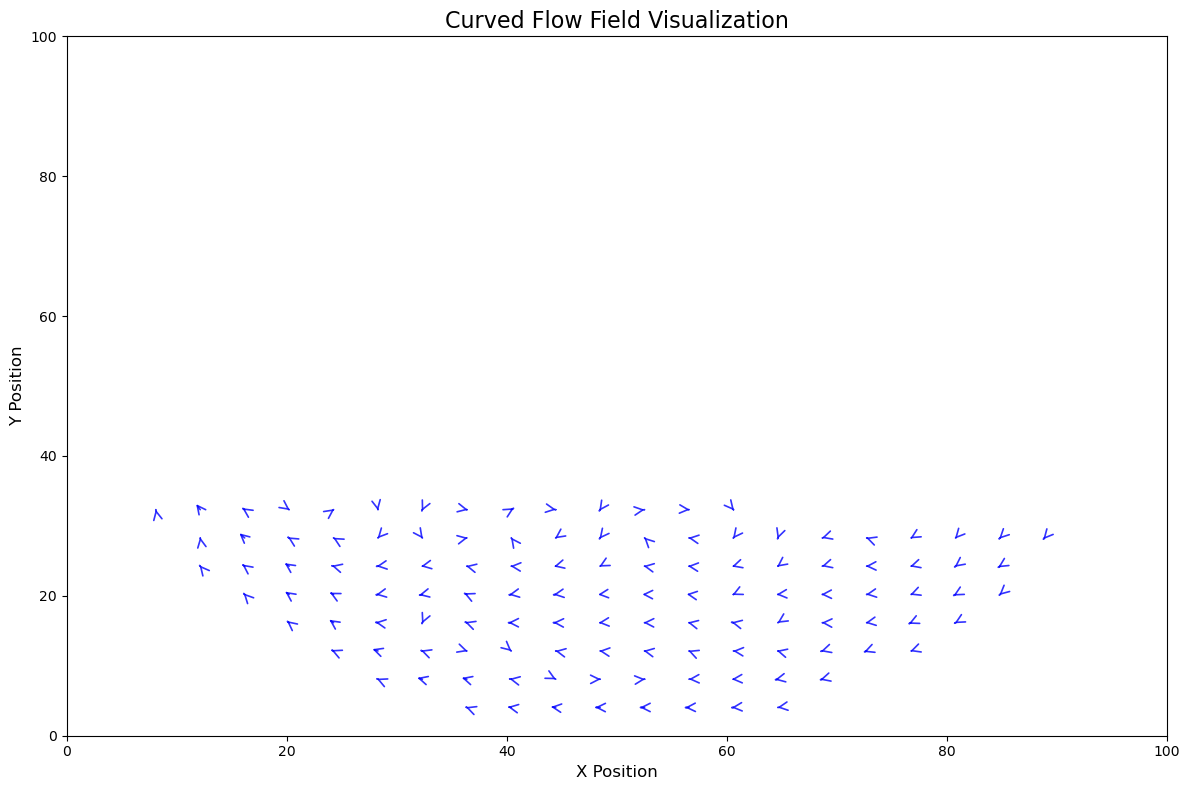

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib.path import Path
from scipy.integrate import solve_ivp

def clean_outliers(data, threshold=1e30):
    """Clean outliers by replacing extreme values with NaN"""
    return np.where(np.abs(data) > threshold, np.nan, data)

# Extract velocity data
vel_zonal = clean_outliers(f[fwd][..., 1])  # timeDaily_avg_velocityZonal
vel_merid = clean_outliers(f[fwd][..., 2])  # timeDaily_avg_velocityMeridional

# Average over depth layers
layer_start = 0
layer_end = 10
u_avg = np.nanmean(vel_zonal[:, layer_start:layer_end], axis=1)
v_avg = np.nanmean(vel_merid[:, layer_start:layer_end], axis=1)

# Get correct spatial dimensions
time_steps, y_size, x_size = u_avg.shape

def plot_curved_streamlines(u_2d, v_2d, x_extent, y_extent, stride=4, max_arrows=120, filename='curved_flow_field.png'):
    """
    Plot curved streamlines/arrows using the velocity field.
    u_2d, v_2d: 2D velocity arrays (shape: [y, x])
    x_extent, y_extent: (min, max) for x and y axes
    stride: grid stride for arrow density
    max_arrows: maximum number of arrows to plot
    """
    y_size, x_size = u_2d.shape
    x = np.linspace(x_extent[0], x_extent[1], x_size)
    y = np.linspace(y_extent[0], y_extent[1], y_size)
    X, Y = np.meshgrid(x, y)

    def velocity_field(t, point):
        x, y = point
        # Handle NaN coordinates
        if np.isnan(x) or np.isnan(y):
            return [0.0, 0.0]
        
        # Calculate indices with clipping and rounding
        i = int(np.clip(np.round((y - y_extent[0]) / (y_extent[1] - y_extent[0]) * (y_size-1)), 0, y_size-1))
        j = int(np.clip(np.round((x - x_extent[0]) / (x_extent[1] - x_extent[0]) * (x_size-1)), 0, x_size-1))
        
        # Handle NaN in velocity data
        u_val = u_2d[i, j] if not np.isnan(u_2d[i, j]) else 0.0
        v_val = v_2d[i, j] if not np.isnan(v_2d[i, j]) else 0.0
        
        return [u_val, v_val]

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_xlim(*x_extent)
    ax.set_ylim(*y_extent)
    ax.set_title("Curved Flow Field Visualization", fontsize=16)
    ax.set_xlabel("X Position", fontsize=12)
    ax.set_ylabel("Y Position", fontsize=12)

    arrow_count = 0
    for i in range(0, y_size, stride):
        for j in range(0, x_size, stride):
            # Only start arrows where both u and v are finite and not zero
            if not np.isfinite(u_2d[i, j]) or not np.isfinite(v_2d[i, j]):
                continue
            if np.abs(u_2d[i, j]) < 1e-8 and np.abs(v_2d[i, j]) < 1e-8:
                continue
            x0, y0 = X[i, j], Y[i, j]
            sol = solve_ivp(velocity_field, [0, 1.5], [x0, y0], method='RK45', rtol=1e-5, atol=1e-8)
            
            if sol.status == 0 and len(sol.y[0]) > 2:
                # Filter out NaN points in the solution
                valid_mask = np.isfinite(sol.y[0]) & np.isfinite(sol.y[1])
                if np.any(valid_mask):
                    # Convert to Path object for FancyArrowPatch
                    vertices = np.column_stack([sol.y[0][valid_mask], sol.y[1][valid_mask]])
                    codes = [Path.MOVETO] + [Path.LINETO] * (len(vertices) - 1)
                    path = Path(vertices, codes)
                    
                    arrow = FancyArrowPatch(
                        path=path,
                        arrowstyle='->',
                        mutation_scale=15,
                        color='blue',
                        linewidth=1.2,
                        alpha=0.8
                    )
                    ax.add_patch(arrow)
                    arrow_count += 1
                    if arrow_count >= max_arrows:
                        break
        if arrow_count >= max_arrows:
            break

    plt.tight_layout()
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    plt.show()
# Example usage with your processed data:
# Use the k-th (k=10) time step and average over depth
k = 10
u_2d = np.nanmean(vel_zonal[k, layer_start:layer_end], axis=0)
v_2d = np.nanmean(vel_merid[k, layer_start:layer_end], axis=0)
plot_curved_streamlines(u_2d, v_2d, x_extent=(0, x_size), y_extent=(0, y_size))


In [ ]:
import xarray as xr

### open tmp files ###

file_path = '~/WORKING/ml_converted/forwards/forward_3/output-0007-01-01-rgr.nc'
file_path = '~/WORKING/ml_converted/forwards/forward_3/mpaso.hist.am.timeSeriesStatsDaily.0007-01-01.nc'


ds = xr.open_dataset(file_path)
print(ds)  # Print a human-readable summary of the dataset

print("\nGlobal attributes containing 'area':")
for k, v in ds.attrs.items():
	if 'area' in k.lower():
		print(f"{k}: {v}")

<xarray.Dataset>
Dimensions:                                  (lat: 100, lon: 100, nbnd: 2,
                                              Time: 26, bnds: 2, nVertLevels: 60)
Coordinates:
  * lat                                      (lat) float64 21.14 21.42 ... 48.86
  * lon                                      (lon) float64 -16.83 ... 16.83
  * Time                                     (Time) object 0007-01-08 12:00:0...
Dimensions without coordinates: nbnd, bnds, nVertLevels
Data variables: (12/14)
    lat_bnds                                 (lat, nbnd) float64 ...
    lon_bnds                                 (lon, nbnd) float64 ...
    gw                                       (lat) float64 ...
    area                                     (lat, lon) float64 ...
    Time_bnds                                (Time, bnds) object ...
    timeDaily_avg_activeTracers_salinity     (Time, nVertLevels, lat, lon) float32 ...
    ...                                       ...
    timeDaily_avg_ve

In [ ]:
import xarray as xr

### open tmp files ###

file_path = '/global/homes/a/abgulhan/WORKING/git_repos/spherical-dyffusion/data/validation/ic_0011/2021010100.nc'
file_path = '/global/homes/a/abgulhan/WORKING/ml_converted/initial_state.nc'
ds = xr.open_dataset(file_path)

print(ds.areaCell.values)
print(ds.areaCell.values.shape)


print("\nGlobal attributes :")
for k, v in ds.attrs.items():
    print(f"{k}: {v}")
    
    
print("Variables:")
for var in ds.data_vars:
    print(var)
    
for var in ds.data_vars:
    print(f"\nVariable: {var}")
    print(ds[var])


print("Coordinates:")
for coord in ds.coords:
    print(coord)
    print(ds[coord])
    
    print("\nGlobal attributes:")
for k, v in ds.attrs.items():
    print(f"{k}: {v}")

print(ds.info())


[7.91522218e+08 7.66417584e+08 7.97514582e+08 ... 7.88365736e+08
 7.88415245e+08 7.88020488e+08]
(8521,)

Global attributes :
model_name: mpas
core_name: ocean
source: MPAS
Conventions: MPAS
git_version: v3.0.1-721-g1442143a95
on_a_sphere: YES
sphere_radius: 6371220.0
is_periodic: NO
x_period: 0.0
y_period: 0.0
history: mpirun -n 4 ./ocean_model
parent_id: avxv5pecm8
z9b06vr1ts
kdypfrhi9x
tfo7phwbtr
mesh_spec: 1.0
config_ocean_run_mode: init
config_do_restart: NO
config_restart_timestamp_name: Restart_timestamp
config_start_time: 0001-01-01_00:00:00
config_stop_time: none
config_run_duration: 0010_00:00:00
config_calendar_type: noleap
config_output_reference_time: 0001-01-01_00:00:00
config_write_output_on_startup: YES
config_pio_num_iotasks: 1
config_pio_stride: 4
config_num_halos: 3
config_block_decomp_file_prefix: graph.info.part.
config_number_of_blocks: 0
config_explicit_proc_decomp: NO
config_proc_decomp_file_prefix: graph.info.part.
config_dt: 00:05:00
config_time_integrator: sp